In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [6]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [7]:
#  lets check shape of the dataset
df.shape

(8425, 23)

In [8]:
df.isnull().sum()   #  lets check null value

#  In all Attributes have null value

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
#  checking Statistical description

df.describe()
# according to this description in this dataset have Outliers some in 'Rainfall', 'Evaporation'

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [10]:
#  counting  variables of 'Location' Attribute

df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [7]:

df['Date']= pd.to_datetime(df['Date'])   # CONVERT into datetime format

df['year']= df['Date'].dt.year     #  CREATING NEW COLUMN FROM  DATE
df['month']= df['Date'].dt.month      #   CREATING  MONTH  COLUMN  FROM  DATE
df['day'] = df['Date'].dt.day
df=df.drop('Date', axis=1)

In [12]:
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   

   Temp9am  Temp3pm RainToday RainTomorrow  year  month  day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2  
2     21.0     23.2        No           No  2008     12    3

In [23]:
#
df[df['MinTemp'].isnull()].head(7)1

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
284         Albury      NaN     18.8       NaN          NaN       NaN   
444         Albury      NaN     31.2       NaN          NaN       NaN   
453         Albury      NaN     26.3       NaN          NaN       NaN   
459         Albury      NaN     22.3       0.0          NaN       NaN   
612         Albury      NaN     11.8       NaN          NaN       NaN   
1189  CoffsHarbour      NaN     29.1       0.0          4.2      12.1   
1518     Newcastle      NaN     19.8       0.4          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
284            N           31.0         SE        NNE           7.0   
444          ESE           31.0        SSE        SSW           7.0   
453           NE           26.0         SE          E           9.0   
459           NE           37.0         NE         NE          24.0   
612          WSW           28.0          N        WNW           2.0   
1189         NNE           67.0          N        NNE          30.0   
1518         NaN            NaN        NaN        NaN           0.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
284           19.0         83.0         46.0       1022.2       1018.2   
444            7.0         33.0         24.0       1020.4       1019.1   
453           13.0         70.0         62.0       1019.4       1018.3   
459           17.0         74.0         93.0       1008.8       1006.6   
612           19.0         97.0         65.0       1019.5       1018.3   
1189          50.0         63.0         58.0       1019.8       1015.4   
1518           0.0         88.0         72.0          NaN          NaN   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  year  \
284        NaN       NaN      8.7     18.1       NaN           No  2009   
444        NaN       NaN     21.0     30.0       NaN           No  2010   
453        2.0       2.0     20.8     24.8       NaN          Yes  2010   
459        8.0       8.0     20.9     20.1        No          Yes  2010   
612        7.0       4.0      6.7     11.3       NaN           No  2010   
1189       1.0       1.0     25.0     26.3        No           No  2009   
1518       1.0       5.0     13.0     18.8        No           No  2013   

      month  day  
284       9   11  
444       2   18  
453       2   27  
459       3    5  
612       8    5  
1189     12   17  
1518      6    9

In [8]:

#
df['MinTemp'].fillna(df.groupby(['Location','month'])['MinTemp'].transform('mean') , inplace=True)

In [9]:
#  lets check that null value is fill by Groupby 'location','month' or not 
df.iloc[[284,444,1189,1518],1]

284      5.537288
444     17.745122
1189    19.640000
1518     9.045000
Name: MinTemp, dtype: float64

In [10]:
# these all are continuous Attributes therefore impute by mean

col = ['MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
      'Temp9am','Temp3pm',]
for i in col:
    df[i].fillna(df.groupby(['Location','month'])[i].transform('mean'), inplace=True)


In [11]:
# IT IS CATEGORICAL TYPE ATTRIBUTES  SO IMPUTE IT BY MODE VALUE

df['RainToday'].fillna(df.groupby(['Location','month'])['RainToday'].transform(lambda x: x.mode()[0]), inplace=True)
df['RainTomorrow'].fillna(df.groupby(['Location','month'])['RainTomorrow'].transform(lambda x: x.mode()[0]), inplace=True)
df['WindDir9am'].fillna(df.groupby(['Location','month'])['WindDir9am'].transform(lambda x: x.mode()[0]), inplace=True)
df['WindDir3pm'].fillna(df.groupby(['Location','month'])['WindDir3pm'].transform(lambda x: x.mode()[0]), inplace=True)

df['WindGustDir'].fillna(df.groupby(['year','month'])['WindGustDir'].transform(lambda x: x.mode()[0]), inplace=True)


In [12]:
# IT IS CONTINUOUS ATTRIBUTES SO IMPUTE BY MEAN

df['Sunshine'].fillna(df.groupby([ 'year'])['Sunshine'].transform('mean'), inplace= True)

df['WindGustSpeed'].fillna(df.groupby(['year'])['WindGustSpeed'].transform('mean'), inplace= True)
df['Pressure9am'].fillna(df.groupby(['year'])['Pressure9am'].transform('mean'), inplace= True)
df['Pressure3pm'].fillna(df.groupby(['year'])['Pressure3pm'].transform('mean'), inplace= True)
df['Cloud9am'].fillna(df.groupby(['year'])['Cloud9am'].transform('mean'), inplace= True)
df['Cloud3pm'].fillna(df.groupby(['year'])['Cloud3pm'].transform('mean'), inplace= True)

df['Evaporation'].fillna(df.groupby(['Location','month'])['Evaporation'].transform('mean'), inplace= True)

df['Evaporation'].fillna(df['Evaporation'].mode()[0], inplace=True) # some null vale have remain so it fillna again 
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace= True)        # some null vale have remain so it fillna again

In [13]:
# CHECKING AGAIN NULL VALUE IN DATASET AFTER IMPUTING 

df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [45]:
df.info() 
# some attributes  are object datatype types  & maximum  float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [68]:
#  CHECKING  STATISTICAL DESCRIPTION

df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.192250    23.856691     2.805574     5.914409     7.922418   
std       5.380609     6.114888    10.309936     4.163604     2.882249   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.100000   
50%      13.200000    23.300000     0.000000     5.005594     8.384211   
75%      17.300000    28.000000     1.400000     8.000000     9.091417   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.169255     13.808734     18.470434    67.859571    51.316343   
std        13.827878     10.149919      9.728916    16.781024    18.323781   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.710553  1015.300861     4.864120     4.678457    17.760558   
std       6.366345     6.298238     2.502462     2.324088     5.608611   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.400000  1011.125909     3.000000     3.000000    13.800000   
50%    1017.963052  1015.500000     5.776316     5.154047    17.700000   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm         year        month  
count  8425.000000  8425.000000  8425.000000  
mean     22.439764  2012.102433     6.442136  
std       5.946315     2.473137     3.437994  
min       7.300000  2008.000000     1.000000  
25%      18.100000  2010.000000     3.000000  
50%      22.000000  2011.000000     6.000000  
75%      26.300000  2014.000000     9.000000  
max      44.100000  2017.000000    12.000000

In [14]:
#  convert into numerical form

df['RainToday']= df['RainToday'].map({'No':0, 'Yes':1})
df['RainTomorrow']= df['RainTomorrow'].map({'No':0, 'Yes':1})

<AxesSubplot:>

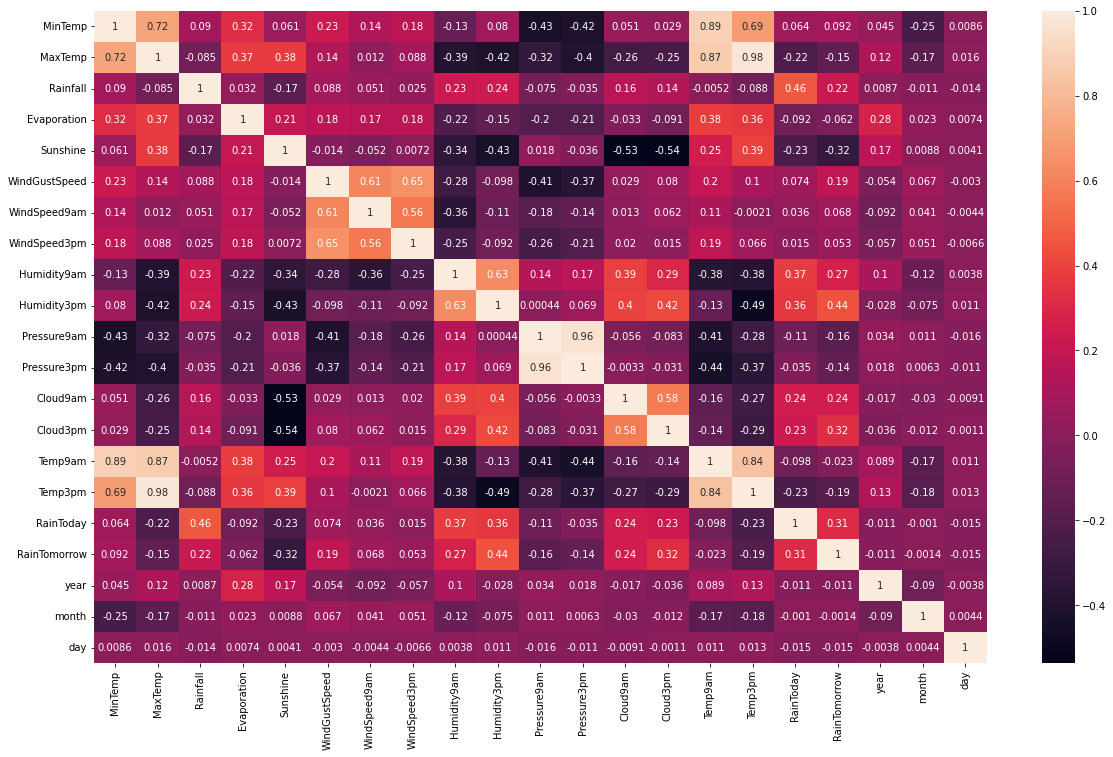

In [47]:
#
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

# some Attributes are positive correlated with each other
# have no any Attributes to strongly positive correlated with 'RainTomorrow'
# 

<Figure size 1728x1728 with 0 Axes>

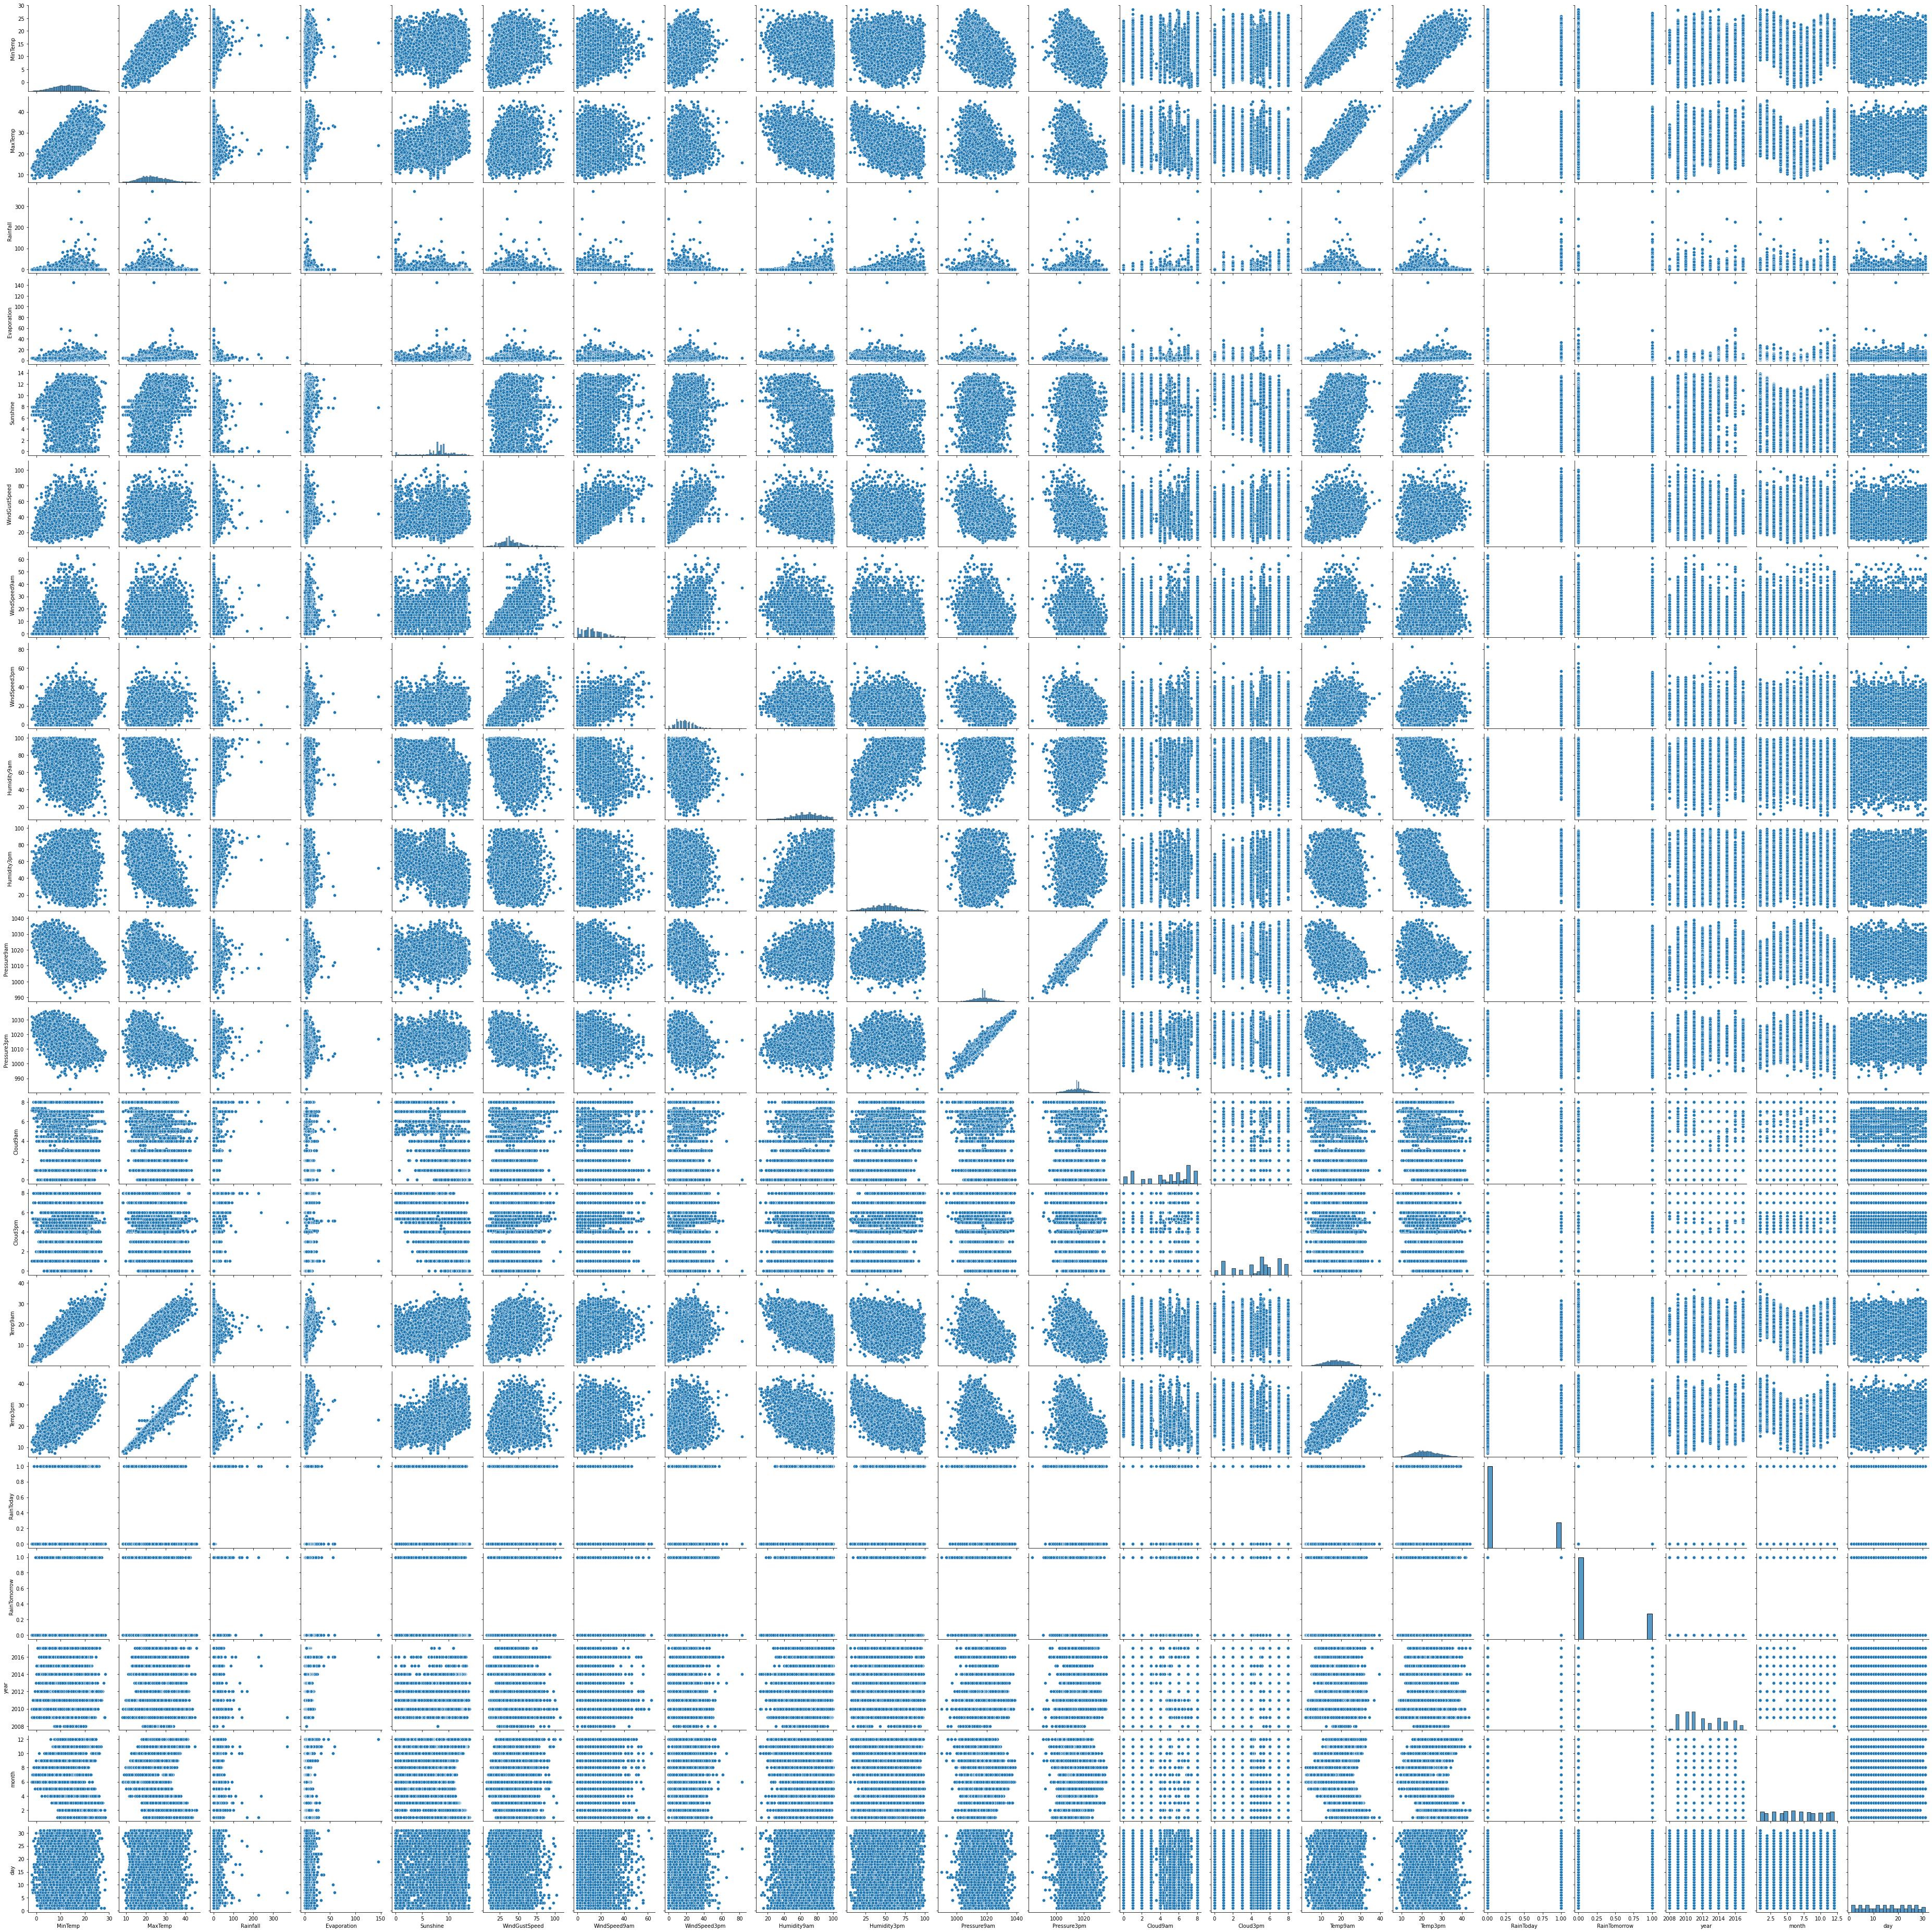

In [48]:
#          PLOTTING  PAIRPLOT 
plt.figure(figsize=(24,24))
sns.pairplot(df)

0    6433
1    1992
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

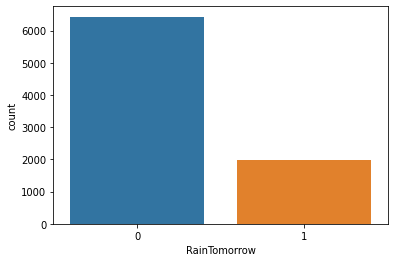

In [136]:
# plotting countplot of 'RainTomorrow'
print(df['RainTomorrow'].value_counts())
sns.countplot(df['RainTomorrow'])

<AxesSubplot:xlabel='Location', ylabel='count'>

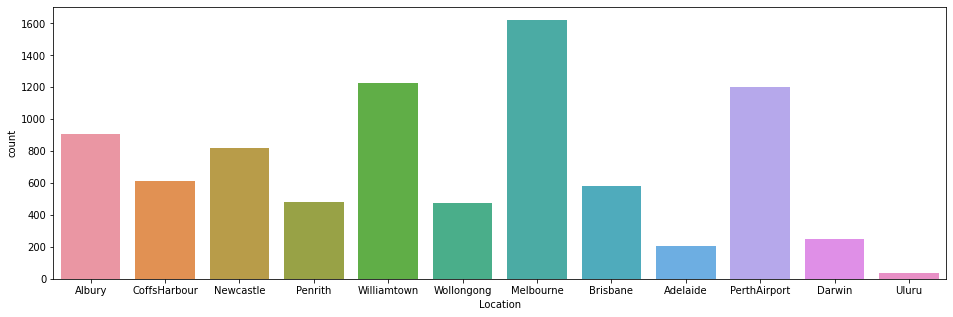

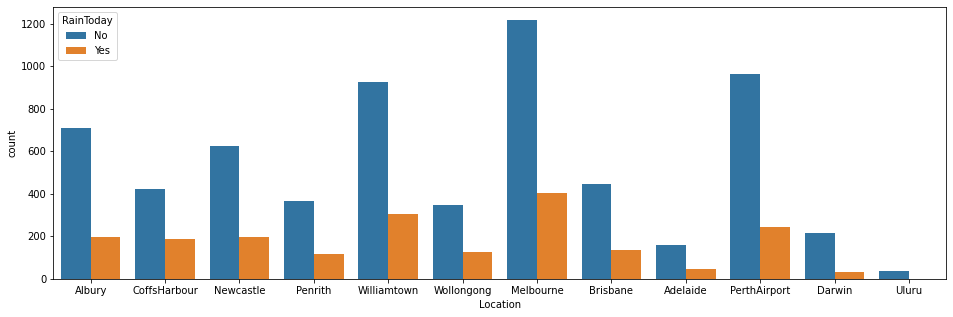

In [73]:
#   PLOTTING  COUNTPLOT OF location 
plt.figure(figsize=(16,5))                # 
sns.countplot(df['Location'])             #

#
plt.figure(figsize=(16,5))
sns.countplot(df['Location'], hue=df['RainToday'])


<AxesSubplot:xlabel='Location', ylabel='count'>

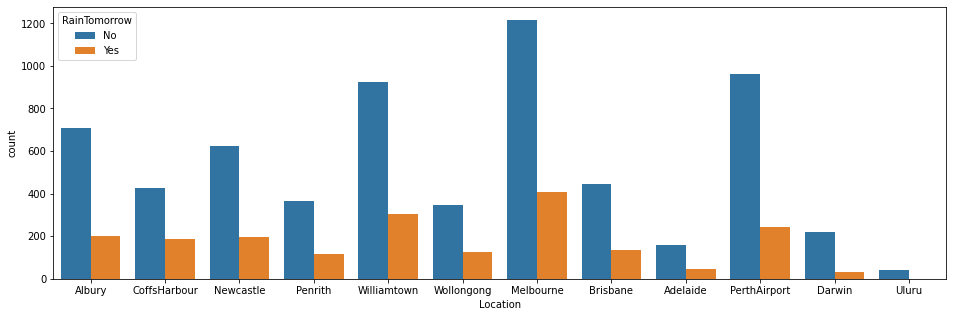

In [74]:
# PLOTTING COUNTPLOT 'Location' with  'RainTomorrow'
plt.figure(figsize=(16,5))
sns.countplot(df['Location'], hue=df['RainTomorrow'])
#  variables of RainTomorrow are distributed in same ratio with all Location's variables
#

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

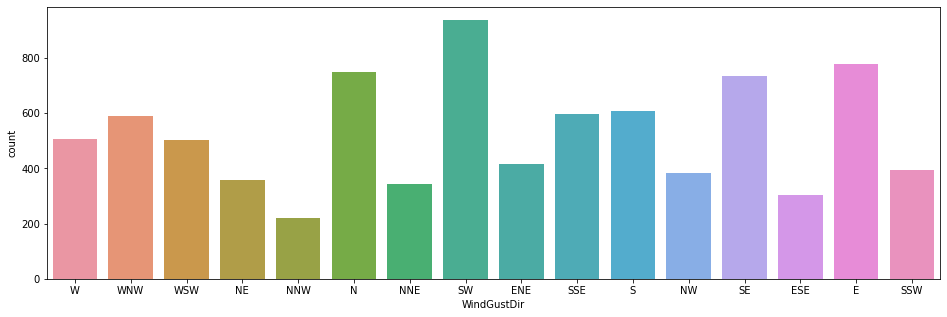

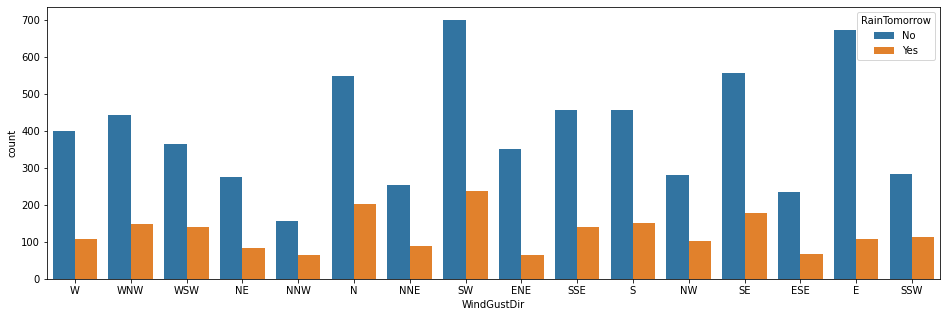

In [75]:
#                plotting  countplot of 'WindGustDir'  with 'RainTomorrow'
plt.figure(figsize=(16,5))
sns.countplot(df['WindGustDir'])

#
plt.figure(figsize=(16,5))
sns.countplot(df['WindGustDir'], hue=df['RainTomorrow'])
  #  

<AxesSubplot:xlabel='Humidity3pm', ylabel='Temp3pm'>

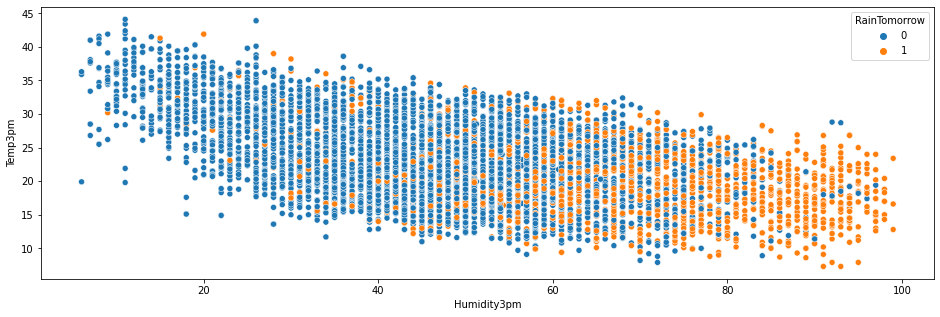

In [87]:
#  LET'S CHECK WHETHER 'Humidity3pm' & 'Temp3pm' ARE HOW THE IMPACT ON 'RainTomorrow'
#  plotting scatterplot  of   'Humidity3pm'  vs  'Temp3pm' 

plt.figure(figsize=(16,5))
sns.scatterplot( df['Humidity3pm'], df['Temp3pm'], hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

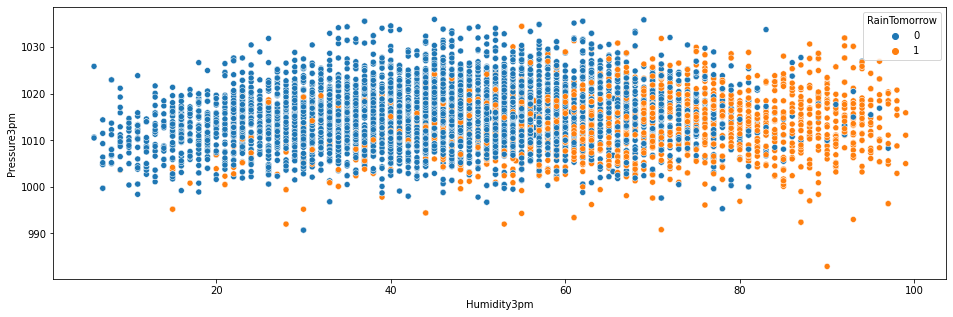

In [95]:
#
plt.figure(figsize=(16,5))
sns.scatterplot( df['Humidity3pm'], df['Pressure3pm'], hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='WindSpeed3pm'>

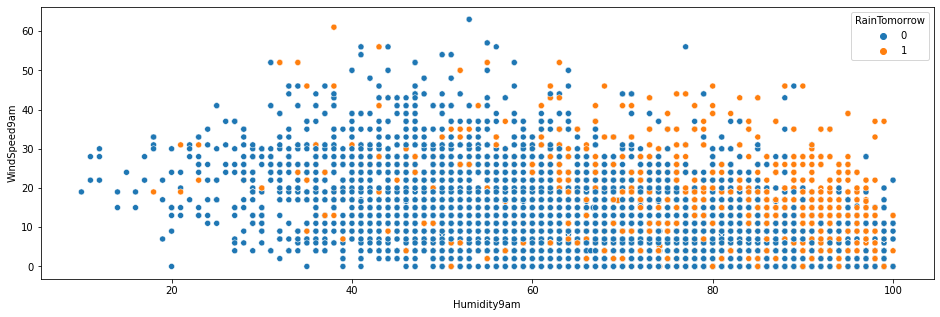

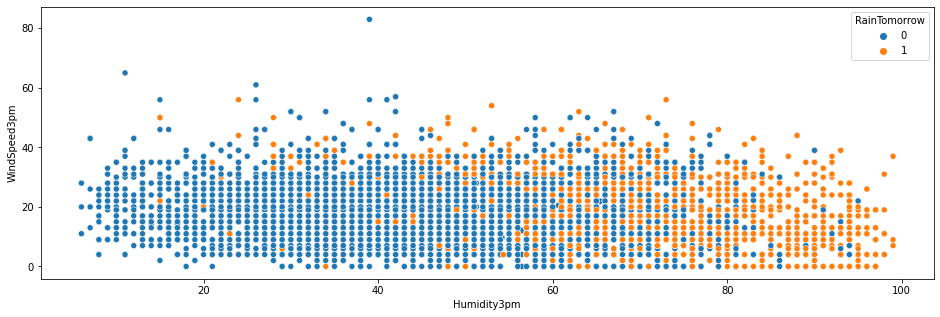

In [112]:
#  PLOTTING SCATTERPLOT OF 'Humidity9am'  VS 'WindSpeed9am'  with 'RainTomorrow'
plt.figure(figsize=(16,5))
sns.scatterplot( df['Humidity9am'], df['WindSpeed9am'], hue=df['RainTomorrow'])

#
plt.figure(figsize=(16,5))
sns.scatterplot( df['Humidity3pm'], df['WindSpeed3pm'], hue=df['RainTomorrow'])
#  

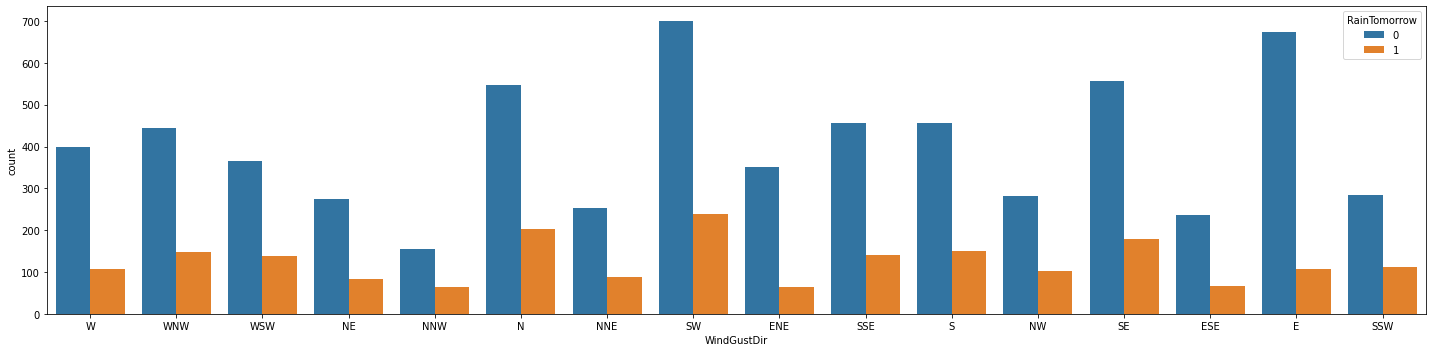

In [139]:
#

plt.figure(figsize=(20,5))
sns.countplot( df['WindGustDir'], hue=df['RainTomorrow'])
plt.tight_layout()
# 
##  variables of RainTomorrow are distributed in same ratio with all WindGustDir's variables but very fewer differences 
#    showing countplot

In [140]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     4.794632  8.624603           W   
1   Albury      7.4     25.1       0.0     4.794632  8.624603         WNW   
2   Albury     12.9     25.7       0.0     4.794632  8.624603         WSW   
3   Albury      9.2     28.0       0.0     4.794632  8.624603          NE   
4   Albury     17.5     32.3       1.0     4.794632  8.624603           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.334247   
1         44.0         25.0       1010.6       1007.8  6.373961  5.334247   
2         38.0         30.0       1007.6       1008.7  6.373961  2.000000   
3         45.0         16.0       1017.6       1012.8  6.373961  5.334247   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  
0     16.9     21.8          0             0  2008     12  
1     17.2     24.3          0             0  2008     12  
2     21.0     23.2          0             0  2008     12  
3     18.1     26.5          0             0  2008     12  
4     17.8     29.7          0             0  2008     12

In [ ]:
PLOTTING DISTRIBUTION PLOT

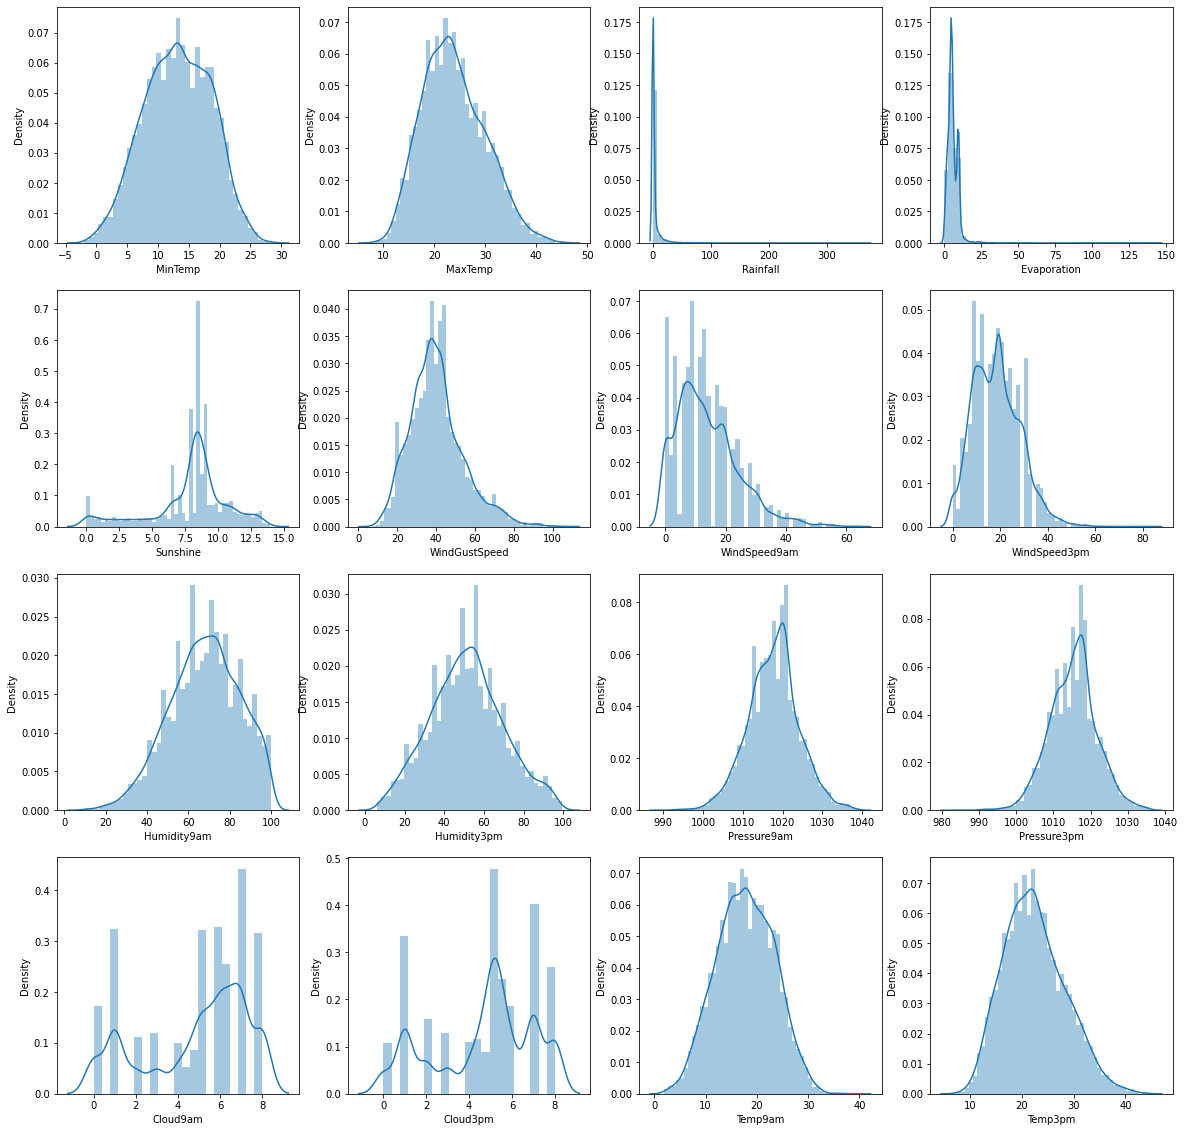

In [146]:
# lets see how is data distributed for every columns  / CHECK DATA IS NORMAAL DISTRIBUTED OR NOT
plt.figure(figsize=(20,20))
p=1
for col in df.select_dtypes(include=['int','float']).columns:
    if p <=16:
        ax = plt.subplot(4,4,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()       ##   seem in some attributes have skewness   'Rainfall', 'evaporation'   

In [15]:
#                   APPLY LABLEENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='object'):
    
    d =le.fit_transform(df[i])               # label encoder conert categorical
    df[i]= d                                            #      value into numeric alphabetical wise eg= a=0,b=1,d=3
        

In [16]:
df.head(4)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.0  7.889107           13   
1         1      7.4     25.1       0.0          4.0  7.889107           14   
2         1     12.9     25.7       0.0          4.0  7.889107           15   
3         1      9.2     28.0       0.0          4.0  7.889107            4   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.565217   
1         44.0         25.0       1010.6       1007.8  6.153846  5.565217   
2         38.0         30.0       1007.6       1008.7  6.153846  2.000000   
3         45.0         16.0       1017.6       1012.8  6.153846  5.565217   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  
3     18.1     26.5          0             0  2008     12    4

In [19]:
x= df.drop('RainTomorrow', axis=1)


In [18]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #

#   multicollinearity  problem in this dataset
#  lets drop some Attributes  as a 'MaxTemp','year','Temp3pm','Pressure9am',

features      vif_value
0        Location       5.322776
1         MinTemp      58.594335
2         MaxTemp     497.045783
3        Rainfall       1.413074
4     Evaporation       3.383608
5        Sunshine      15.655414
6     WindGustDir       5.534590
7   WindGustSpeed      22.753102
8      WindDir9am       4.931800
9      WindDir3pm       6.009996
10   WindSpeed9am       5.993546
11   WindSpeed3pm       9.090723
12    Humidity9am      69.642133
13    Humidity3pm      51.472499
14    Pressure9am  540576.304294
15    Pressure3pm  519850.205891
16       Cloud9am       8.736199
17       Cloud3pm       8.874042
18        Temp9am     198.908678
19        Temp3pm     598.402942
20      RainToday       2.063988
21           year   41374.153254
22          month       5.260150
23            day       4.223261

In [20]:
x= x.drop(['MaxTemp','year','Temp3pm','Pressure9am'], axis=1)

In [21]:
X= x[['MinTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
       'Humidity3pm','Pressure3pm','Cloud9am','Cloud3pm','Temp9am']]
X.skew()  

MinTemp          -0.093855
Rainfall         13.196745
Evaporation      10.950378
Sunshine         -0.930988
WindGustSpeed     0.781468
WindSpeed9am      0.961068
WindSpeed3pm      0.503518
Humidity9am      -0.263182
Humidity3pm       0.111302
Pressure3pm      -0.029246
Cloud9am         -0.433089
Cloud3pm         -0.340739
Temp9am          -0.018567
dtype: float64

In [22]:
#  LETS REMOVE  SKEWNESS
for index in X.skew().index:
    if X.skew().loc[index]> 0.6:
        X[index]= np.log1p(X[index])
    if X.skew().loc[index]< -0.6:
        X[index]= np.square(X[index])


In [23]:
X.skew()   # checking again skewness

MinTemp         -0.093855
Rainfall         1.799411
Evaporation      0.177491
Sunshine         0.449302
WindGustSpeed   -0.359308
WindSpeed9am    -0.002752
WindSpeed3pm     0.503518
Humidity9am     -0.263182
Humidity3pm      0.111302
Pressure3pm     -0.029246
Cloud9am        -0.433089
Cloud3pm        -0.340739
Temp9am         -0.018567
dtype: float64

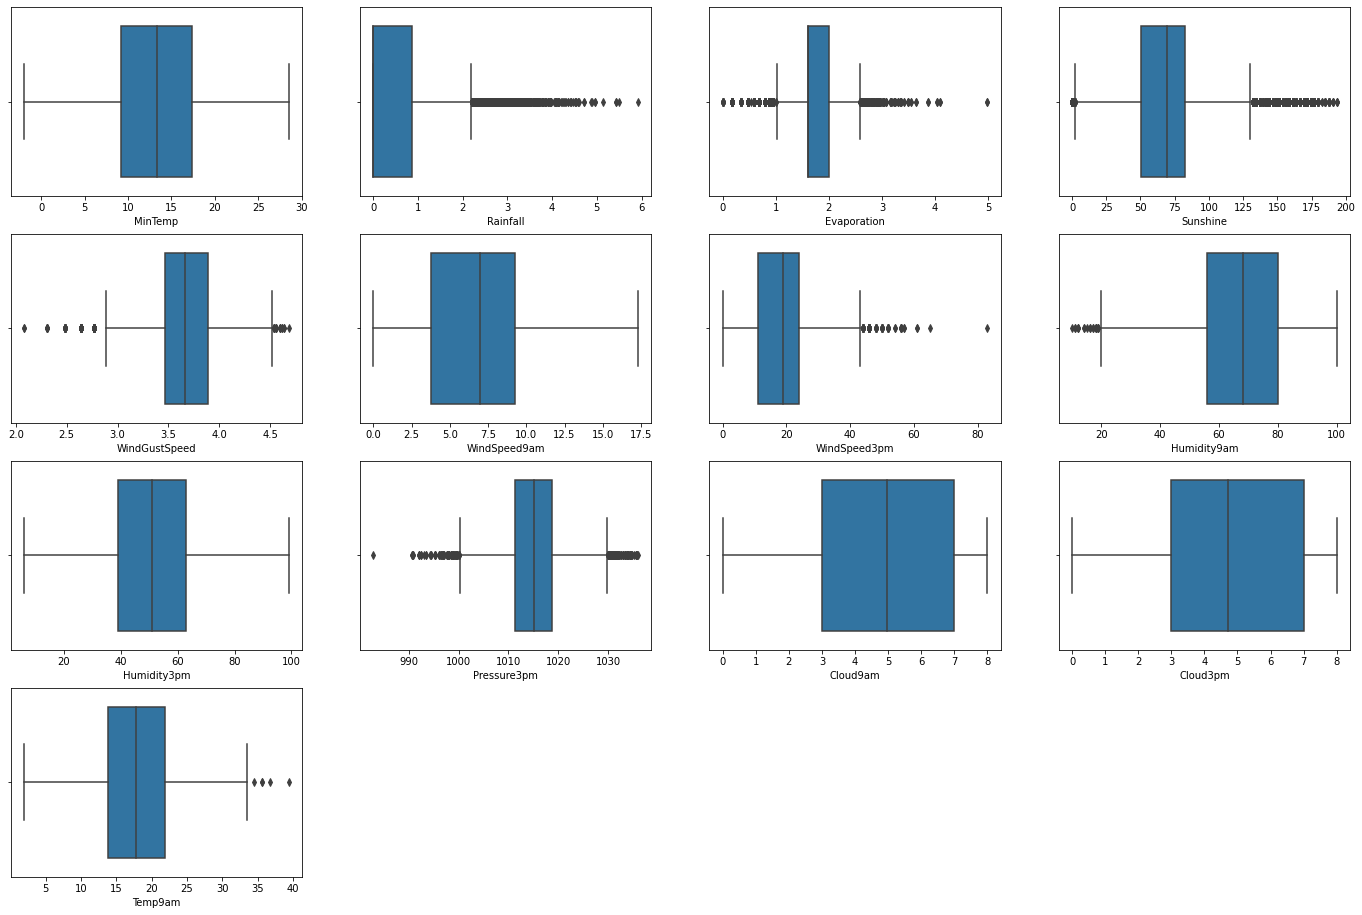

In [24]:
#  lets plot the boxplot over continuous Attributes for checking outliers

plt.figure(figsize=(24,16))
p= 1

for col in X.columns:
    if p<=16:                                      
        ax=plt.subplot(4,4,p)                          
        sns.boxplot(X[col])
    p+=1
plt.show()       #   half of the Attributes  have outliers

In [25]:
from scipy.stats import zscore

(np.abs(zscore(X))<3).all()


MinTemp           True
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm       True
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
dtype: bool

In [26]:
#       remove OUTLIERS 

x['RainTomorrow']= df['RainTomorrow']

from scipy.stats import zscore

z_scores=zscore(X)
df_new = x.loc[(abs(z_scores)<3).all(axis=1)]
print('original-shape=', x.shape)
print('new dataset-shape=', df_new.shape)

original-shape= (8425, 21)
new dataset-shape= (8066, 21)


In [64]:
df_new.head()

Location  MinTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4       0.6          4.0  7.902771           13   
1         1      7.4       0.0          4.0  7.902771           14   
2         1     12.9       0.0          4.0  7.902771           15   
3         1      9.2       0.0          4.0  7.902771            4   
4         1     17.5       1.0          4.0  7.902771           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         71.0         22.0       1007.1       8.0  5.334247     16.9   
1         44.0         25.0       1007.8       5.0  5.334247     17.2   
2         38.0         30.0       1008.7       5.0  2.000000     21.0   
3         45.0         16.0       1012.8       5.0  5.334247     18.1   
4         82.0         33.0       1006.0       7.0  8.000000     17.8   

   RainToday  month  day  RainTomorrow  
0          0     12    1             0  
1          0     12    2             0  
2          0     12    3             0  
3          0     12    4             0  
4          0     12    5             0

In [27]:
x= df_new.drop('RainTomorrow', axis=1)

y= df_new.RainTomorrow      # Target-Attributes

In [28]:
print(y.shape)
print(x.shape)

(8066,)
(8066, 20)


In [29]:
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [30]:
#
sc= StandardScaler()
scaled= sc.fit_transform(x)
scaled= pd.DataFrame(scaled, columns= x.columns)

In [31]:
from imblearn.over_sampling import SMOTE
smp= SMOTE(0.60)
x1, y1= smp.fit_resample(scaled,y)

print(y.value_counts(),)
print('\n after over_sampling \n', y1.value_counts())

0    6228
1    1838
Name: RainTomorrow, dtype: int64

 after over_sampling 
 0    6228
1    3736
Name: RainTomorrow, dtype: int64


In [32]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE           IN TRAINING PROCESS           # finding best random_state

def max_score(model,x1,y1):
    maxf= 0
    rs= 0
    for r_state in range(50,120):
        x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = r_state,test_size=0.30,)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        tmp = accuracy_score(y_test,y_pred)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",maxf)


In [33]:

from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=12, shuffle=True, random_state=59)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('confusion_matrix \n', confusion_matrix(y_test,y_pred))
    print('roc_auc_score =', roc_auc_score(y_test,y_pred))

def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [126]:
#  LETS USE RANDOMFOREST-CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()                        
max_score(rf ,x,y)

maximum accuracy_score is at random state : 50  and it is : 0.8913672036348617
maximum accuracy_score is at random state : 53  and it is : 0.8983890954151177
maximum accuracy_score is at random state : 61  and it is : 0.9008674101610905
maximum accuracy_score is at random state : 111  and it is : 0.9037587773647253


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 52,test_size=0.30,)
model_score(rf,x_train,y_train,x_test,y_test)                           #      RANDOMFOREST-CLASSIFIER

training_score = 1.0
test_accuracy_score= 0.8905410987195373
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1906
           1       0.83      0.61      0.70       515

    accuracy                           0.89      2421
   macro avg       0.87      0.79      0.82      2421
weighted avg       0.89      0.89      0.88      2421

confusion_matrix 
 [[1842   64]
 [ 201  314]]
roc_auc_score = 0.7880652818386497


In [ ]:
ACCURACY_SCORE ON ORIGINAL DATASet , LOGISTIC-REGRESSION=82, RANDOM-FOREST=89


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()                        
max_score(lr ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.7836120401337793
maximum accuracy_score is at random state : 52  and it is : 0.7849498327759198
maximum accuracy_score is at random state : 60  and it is : 0.7852842809364549
maximum accuracy_score is at random state : 67  and it is : 0.7876254180602007
maximum accuracy_score is at random state : 84  and it is : 0.7906354515050167


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 84,test_size=0.30,)
model_score(lr,x_train,y_train,x_test,y_test)  

training_score = 0.7753082879265845
test_accuracy_score= 0.7906354515050167
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1876
           1       0.76      0.64      0.70      1114

    accuracy                           0.79      2990
   macro avg       0.78      0.76      0.77      2990
weighted avg       0.79      0.79      0.79      2990

confusion_matrix 
 [[1646  230]
 [ 396  718]]
roc_auc_score = 0.7609614788330724


In [36]:



                                                 #  LETS USE RANDOMFOREST-CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)                        
max_score(rf ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.9110367892976589
maximum accuracy_score is at random state : 63  and it is : 0.9130434782608695
maximum accuracy_score is at random state : 67  and it is : 0.9137123745819398
maximum accuracy_score is at random state : 77  and it is : 0.9157190635451505
maximum accuracy_score is at random state : 112  and it is : 0.9167224080267559


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 77,test_size=0.30,)
model_score(rf,x_train,y_train,x_test,y_test)  

training_score = 1.0
test_accuracy_score= 0.9153846153846154
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1894
           1       0.90      0.87      0.88      1096

    accuracy                           0.92      2990
   macro avg       0.91      0.91      0.91      2990
weighted avg       0.92      0.92      0.92      2990

confusion_matrix 
 [[1784  110]
 [ 143  953]]
roc_auc_score = 0.9057237029728917


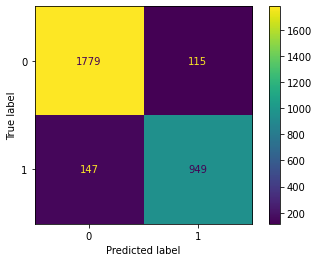

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 77,test_size=0.30,)

rf.fit(x_train,y_train)
predict= rf.predict(x_test)
cm= confusion_matrix(y_test, predict, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf.classes_)
disp.plot()
plt.show()

In [42]:

#                                                   lets  use  EXTRATREE-CLASSIFIER 
from sklearn.ensemble import ExtraTreesClassifier                   
tc = ExtraTreesClassifier(bootstrap=True, oob_score=True)
max_score(tc ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.9133779264214047
maximum accuracy_score is at random state : 52  and it is : 0.9167224080267559
maximum accuracy_score is at random state : 61  and it is : 0.920066889632107
maximum accuracy_score is at random state : 119  and it is : 0.9234113712374582


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 119,test_size=0.30,)
model_score(tc,x_train,y_train,x_test,y_test)                             #     EXTRATREE-CLASSIFIER

training_score = 1.0
test_accuracy_score= 0.9190635451505017
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1885
           1       0.90      0.88      0.89      1105

    accuracy                           0.92      2990
   macro avg       0.91      0.91      0.91      2990
weighted avg       0.92      0.92      0.92      2990

confusion_matrix 
 [[1777  108]
 [ 134  971]]
roc_auc_score = 0.9107193009829926


In [89]:

#                                                       LETS TRAIN & TEST THE MODEL WITH   SVC
from sklearn.svm import SVC
svm = SVC()
max_score(svm ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.8412433155080213
maximum accuracy_score is at random state : 52  and it is : 0.8442513368983957
maximum accuracy_score is at random state : 66  and it is : 0.8499331550802139


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 52,test_size=0.30,)
model_score(svm , x_train,y_train,x_test,y_test)                             #     SVM-CLASSIFIER

training_score = 0.8701819744949133
test_accuracy_score= 0.8442513368983957
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1874
           1       0.81      0.76      0.78      1118

    accuracy                           0.84      2992
   macro avg       0.84      0.83      0.83      2992
weighted avg       0.84      0.84      0.84      2992

roc_auc_score = 0.8271345194479394


In [87]:


#                                                       LETS  USE   GRADIENTBOOSTING-CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
max_score(gb ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.8375668449197861
maximum accuracy_score is at random state : 51  and it is : 0.8385695187165776
maximum accuracy_score is at random state : 52  and it is : 0.838903743315508
maximum accuracy_score is at random state : 53  and it is : 0.839572192513369
maximum accuracy_score is at random state : 54  and it is : 0.8415775401069518
maximum accuracy_score is at random state : 55  and it is : 0.8512700534759359
maximum accuracy_score is at random state : 118  and it is : 0.8552807486631016


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 55,test_size=0.30,)
model_score(gb,x_train,y_train,x_test,y_test)                             #     GRADIENTBOOSTING-CLASSIFIER

training_score = 0.8604384582318384
test_accuracy_score= 0.8506016042780749
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      1887
           1       0.84      0.74      0.79      1105

    accuracy                           0.85      2992
   macro avg       0.85      0.83      0.84      2992
weighted avg       0.85      0.85      0.85      2992

roc_auc_score = 0.8279279279279279


In [93]:

x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 55,test_size=0.30,)
cross_val(gb,x_train,y_train, 'GradientBoosting-classifier')            #    cross-validation GRADIENTBOOSTING-CLASSIFIER
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 52,test_size=0.30,)
cross_val(tc,x_train,y_train,'Extratree-classifier')                             #   cross-validation   EXTRATREE-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 77,test_size=0.30,)
cross_val(rf,x_train,y_train, 'RandomForest')                           #  cross-validation    RANDOMFOREST-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 52,test_size=0.30,)
cross_val(lr,x_train,y_train, 'lOGISTIC-REGRESSION')                           #  cross-validation-score   lOGISTIC-REGRESSION
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 52,test_size=0.30,)
cross_val(svm ,x_train,y_train, 'SVC')                           #  cross-validation-score   SVC



cross_val_score with GradientBoosting-classifier = 0.8322149668876784
********************
cross_val_score with Extratree-classifier = 0.9001275105330501
********************
cross_val_score with RandomForest = 0.8984105296985684
********************
cross_val_score with lOGISTIC-REGRESSION = 0.8233338603544594
********************
cross_val_score with SVC = 0.8347932722544571


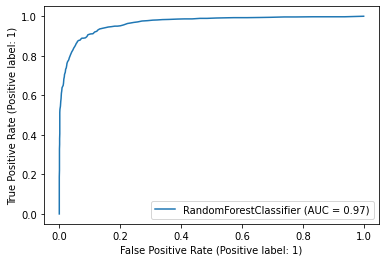

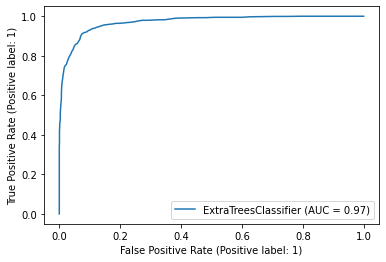

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x1, y1,random_state = 52,test_size=0.30,)


plot_roc_curve(rf, x_test, y_test)        #   roc_curve  of RandomForest model
plot_roc_curve(tc, x_test, y_test)        #   roc_curve  of ExtraTrees model

In [95]:

#  HYPERPARAMATER TUNING   with                '''' RANDOMFOREST-classification''''

x_train, x_test,y_train,y_test= train_test_split(x1, y1, test_size=0.30, random_state= 77)
param= {'n_estimators':[100,180, 280],'max_depth':[9,10,14,18] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid = GridSearchCV(rf ,param, cv=kfold,)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 280} 



In [73]:
G_RF = RandomForestClassifier(max_depth=18,oob_score=True,n_estimators=280,min_samples_split=3)
G_RF.fit(x_train, y_train)
pred = G_RF.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')
print('confusion_matrix \n ', confusion_matrix(y_test, pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred))

accuracy_score= 0.9133779264214047
classification_report 
                precision    recall  f1-score   support

           0       0.92      0.94      0.93      1885
           1       0.90      0.87      0.88      1105

    accuracy                           0.91      2990
   macro avg       0.91      0.90      0.91      2990
weighted avg       0.91      0.91      0.91      2990
 

confusion_matrix 
  [[1775  110]
 [ 149  956]] 

roc_auc_score = 0.9034014666874708


In [97]:

#  HYPERPARAMATER TUNING   with                '''' ExtraTree-classification''''

x_train, x_test,y_train,y_test= train_test_split(x1, y1, test_size=0.30, random_state= 119)
param= {'n_estimators':[180, 280],'max_depth':[13,15,17,19] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid = GridSearchCV(tc ,param, cv=kfold,n_jobs=-1)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 380} 



In [65]:
x_train, x_test,y_train,y_test= train_test_split(x1, y1, test_size=0.30 ,random_state= 119)

G_ET = ExtraTreesClassifier(max_depth=15,oob_score=True,n_estimators=280,bootstrap=True,min_samples_split=3)
G_ET.fit(x_train, y_train)
ET_pred = G_ET.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred))

accuracy_score= 0.9070234113712374
classification_report 
                precision    recall  f1-score   support

           0       0.91      0.94      0.93      1885
           1       0.89      0.85      0.87      1105

    accuracy                           0.91      2990
   macro avg       0.90      0.90      0.90      2990
weighted avg       0.91      0.91      0.91      2990
 

roc_auc_score = 0.8953658917147761


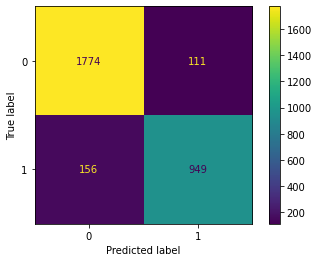

In [59]:
#  PLOT THE CONFUSION_MATRIX

cm= confusion_matrix(y_test, ET_pred, labels= G_ET.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=G_ET.classes_)
disp.plot()                  # 55 times wrong prediction when predict RainTomorrow = No  
plt.show()                   # 155 times qrong prediction when predict that 'RainTomorrow'= Yes

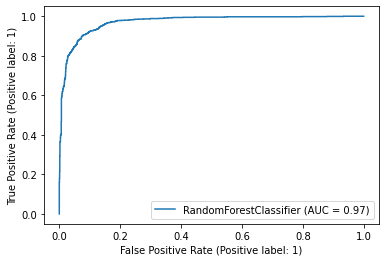

In [74]:
#  plot roc_curve of HYpertunned model of RandomForest
plot_roc_curve(G_RF, x_test, y_test)

In [ ]:
  SAVE  THE  MODEL 

In [84]:
import pickle    ###  SAVE HYPERTUNNED  RANDOMFOREST MODEL

RainTomorrow_model = 'RainTomorrow_model.pickle'

pickle.dump(G_RF, open(RainTomorrow_model, 'wb'))

In [ ]:
1. TN(True Negative) means that the model is predicted to predict that tomorrow will not rain , 
  if the model predicts TRUE then it will be  TN . If it predict wrong then it will be FP(False Positive)
2. TP(True Positive)  means the model is predicted to predict that tomorrow will be rain ,
  If the model predicts TRUE then it will be TP . If the model predicts wrong then it will be  FN(False Negative)
    Trying to minimize   FN while creating model on this dataset 
            dataset result=              
                                         TN= 1787              FP= 83 
  RandomForest-Model                     FN= 161               TP= 961


In [ ]:
Data-PreProcessing PART

. Most of the attributes in this dataset have Null value so null value is removed by using groupby method 
. The null value of Continuous Attributes is filled by mean with using groupby 
. Some of the Attributes were such that about 40 perecent of their data was null, by filling the null value in these type
  of Attributes , I think that no suitable information will be obtained because around 40 percent NUll value in a 
     column is enough
 . if we fill NUll data by data analysis in any way , then it will not be thae same as the original data 
  because NUll data ismore

    EDA  PART 
. Through the Correlation plot . we came to know that very few columns are positive correlated with 'target-Attribute'
   and maximum columns are positive correlated with target-Attribute
. some columns are strongly positive correlated with each other
. By plotting  scatterplot, barplot , it was found that there are some such Attributes which are more important to predict 
  'Raintomorrow' because good information was getting from them
. Some columns are useless to predict whether it will rain tomorrow or not

. we checked each column to see how they are related to "RainTomorrow" or not,  whether it is postive/negative 
    correlated or not

. Some input-columns are highly correlated to each other means there can be a multicollinearity problem so use VIF to check
  multicollinearity problem and last remove some columns to removed multicollinearity
. Some Attributes of the dataset were skewed so using np.log1p & np.sqrt  to reduced the skewness a lot

In [101]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.0  7.889107           13   
1         1      7.4     25.1       0.0          4.0  7.889107           14   
2         1     12.9     25.7       0.0          4.0  7.889107           15   
3         1      9.2     28.0       0.0          4.0  7.889107            4   
4         1     17.5     32.3       1.0          4.0  7.889107           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.565217   
1         44.0         25.0       1010.6       1007.8  6.153846  5.565217   
2         38.0         30.0       1007.6       1008.7  6.153846  2.000000   
3         45.0         16.0       1017.6       1012.8  6.153846  5.565217   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  
3     18.1     26.5          0             0  2008     12    4  
4     17.8     29.7          0             0  2008     12    5

In [108]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

x2= df.drop('Rainfall', axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= x2.columns
vif_value= [vif(x2.values, i) for i in range(len(x2.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #

#   multicollinearity  problem in this dataset
#  lets drop some Attributes  as a 'MaxTemp','year','Temp3pm','Pressure9am',

features      vif_value
0        Location       5.335296
1         MinTemp      58.625165
2         MaxTemp     496.136845
3     Evaporation       3.360968
4        Sunshine      15.765589
5     WindGustDir       5.533399
6   WindGustSpeed      23.396275
7      WindDir9am       4.924813
8      WindDir3pm       6.009952
9    WindSpeed9am       5.987944
10   WindSpeed3pm       9.099463
11    Humidity9am      69.508863
12    Humidity3pm      53.574577
13    Pressure9am  541122.978137
14    Pressure3pm  521474.367300
15       Cloud9am       8.737837
16       Cloud3pm       8.939620
17        Temp9am     198.903458
18        Temp3pm     596.870813
19      RainToday       1.822803
20   RainTomorrow       1.897428
21           year   41595.064031
22          month       5.260882
23            day       4.224777

In [109]:

x2= df.drop(['year','Temp3pm','Pressure3pm','Humidity9am','MaxTemp'] , axis=1)

y2= df.Rainfall

In [110]:
#   SCALING THE INPUT DATA
sc= StandardScaler()
scaled= sc.fit_transform(x2)

scaled1 = pd.DataFrame(scaled, columns= x2.columns)


In [77]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE           IN TRAINING PROCESS           # finding best random_state

def max_score1(model,x2 ,y2):
    maxf= 0
    rs= 0
    for r_state in range(50,120):
        x_train,x_test,y_train,y_test=train_test_split(x2, y2,random_state = r_state,test_size=0.30,)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        tmp = r2_score(y_test,y_pred)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum r2_score is at random state :",rs," and it is :",maxf)


In [115]:

from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=5,shuffle=True ,random_state=59)


    
def model_score1(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(ytrain,pred))
        
    print('test_accuracy_score=', r2_score(y_test,y_pred))
    print('mean_squared_error ', mean_squared_error(y_test,y_pred))
    print('mean_absolute_error ', mean_absolute_error(y_test,y_pred))

def cross_val1(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= 5,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [111]:
####                     TRAIN THE MODEL  WITH   LINEAR-REGRESSOR

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
max_score1(LR, scaled1, y2)

maximum r2_score is at random state : 50  and it is : 1.0


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x2, y2,random_state = 62,test_size=0.30,)
model_score1(LR,x_train,y_train,x_test,y_test)


training_score = 1.0
test_accuracy_score= 1.0
mean_squared_error  1.6680360955424976e-27
mean_absolute_error  3.1345843719869375e-14


In [113]:


###                     TRAIN THE MODEL  WITH   RANDOMFOREST-REGRESSOR
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
max_score1(RF, scaled1, y2)

maximum r2_score is at random state : 50  and it is : 0.9982229507884891
maximum r2_score is at random state : 56  and it is : 0.9989091361546711
maximum r2_score is at random state : 78  and it is : 0.999577366244587


In [117]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y2,random_state = 78,test_size=0.30,)
model_score1(RF,x_train,y_train,x_test,y_test)


training_score = 0.9949448083302284
test_accuracy_score= 0.9995094797670603
mean_squared_error  0.03550487901934632
mean_absolute_error  0.014404905557514613


In [118]:


####                     TRAIN THE MODEL  WITH   RANDOMFOREST-REGRESSOR

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
max_score1(GB, scaled1, y2)

maximum r2_score is at random state : 50  and it is : 0.99978022585175
maximum r2_score is at random state : 69  and it is : 0.999870625035276
maximum r2_score is at random state : 105  and it is : 0.9998948870585131


In [119]:
x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 50,test_size=0.30,)
model_score1(GB,x_train,y_train,x_test,y_test)



training_score = 0.9999671000168292
test_accuracy_score= 0.9997553013144057
mean_squared_error  0.01591881321748346
mean_absolute_error  0.03171873436735787


In [120]:

x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 50,test_size=0.30,)
cross_val1(GB ,x_train,y_train, 'GradientBoosting-classifier')            #  cross-validation withGRADIENTBOOSTING-Regressor
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(scaled1, y2,random_state = 62,test_size=0.30,)
cross_val1(LR,x_train,y_train,'LinearRegression')                             #   cross-validation with LinearRegression 
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(x2, y2,random_state = 50,test_size=0.30,)
cross_val1(RF ,x_train,y_train, 'RandomForest Regressor')                      #  cross-validation  with RANDOMFOREST-Regressor
print('*'*20)


cross_val_score with GradientBoosting-classifier = 0.9697373045091702
********************
cross_val_score with LinearRegression = 1.0
********************
cross_val_score with RandomForest Regressor = 0.9633673553567281
********************


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

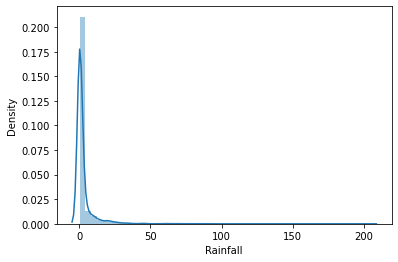

In [123]:

sns.distplot(y_test-LR.predict(x_test))

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

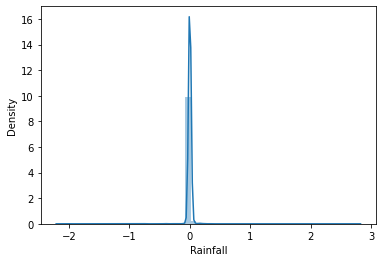

In [124]:
###   randomForest model predict value & original value  difference
sns.distplot(y_test-RF.predict(x_test))

In [125]:

#  HYPERPARAMATER TUNING   with                '''' RANDOMFOREST-classification''''

x_train, x_test,y_train,y_test= train_test_split(scaled1, y2, test_size=0.30, random_state= 76)
param= {'n_estimators':[100,180, ],'max_depth':[10,14,18] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3]}
    
grid = GridSearchCV(RF ,param, cv=kfold,n_jobs=-1)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 180} 



In [127]:
GRID_RF = RandomForestRegressor(max_depth=14,oob_score=True,n_estimators=180,min_samples_split=3)
GRID_RF.fit(x_train, y_train)
pred = GRID_RF.predict(x_test)

print('r2_score=', r2_score(y_test, pred))
print('mean_squared_error = ', mean_squared_error(y_test, pred), '\n')
print('mean_absolute_error = ', mean_absolute_error(y_test, pred), )
print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test, pred)))

r2_score= 0.9947674231598618
mean_squared_error =  0.4679167184389301 

mean_absolute_error =  0.03297108467581742
root_mean_squared_error = 0.6840443833838051


In [129]:
pd.DataFrame({'predict':GRID_RF.predict(x_test), 'Y_TEST':y_test})

predict  Y_TEST
727   18.667731    18.8
46     0.000000     0.0
1136   0.000000     0.0
7111  37.679086    37.4
9      1.400000     1.4
...         ...     ...
1961   1.800000     1.8
8265   0.000000     0.0
6804   0.000000     0.0
4328   0.600000     0.6
1075   0.000000     0.0

[2528 rows x 2 columns]

In [ ]:
SAVE THE  MODEL

In [130]:
import pickle

Rainfall_prediction = 'Rainfall_prediction.pickle'

pickle.dump(GRID_RF, open(Rainfall_prediction, 'wb'))

In [ ]:
. First we do Train_test_split on input-data & target-attribute then data split into train & test data , fit the 
   model on train data then  test the  model accuracy on test data
    
. FIRST  I trainED the model on iput-data without removing multicollinearity problem ,so the r2_score came to 38 percent 

. SECOND  I remove multicollinearity problem from input-data  and then trained the model on input-data ,
       so i get the r2_score = 99 percent 

. I used LinearRegression, RandomForest-Regression,  AdaBoost-Regressor to fit the models and 
  after train the models checking r2_score so the highest r2_score = 99 percent , obtained from all the models . 
  

. applying cross_validation with Kfold on all three model then we get maximum cross_validation_score   
from all the models = above 95 percent, from Linear-Regression we get highest cross_validation-score= 100 percent

.we done Hyperparameter tunning over RandomForest_Model ,but all the models have above r2_score 98 percent  

. we get highest Cross_validation_score from  RandomForest_Model  

  HyperTunned_Model  r2_score = %

  . we make HyperParameter tunning on Randomforest-Model and last predict the test data with this Model  

.Import pickle module save the hypertunned model    